<a href="https://colab.research.google.com/github/MLRG-CEFET-RJ/ml-class/blob/master/DataMining_week08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

One important part of every Data Mining project is to pre-process the data to be used. In this section, we describe some ways of doing data preprocessing through some Python packages.

## Features: discrete vs. quantitative

Features are divided into two major types: discrete and quantitative. The feature type defines the applicable analysis and pre-processing techniques.

- Quantitative features are those associated with a virtually infinite number of possible values.

- Discrete features can only take on one value within a specified set of values.

For discrete (or categorical) features, the arithmetic rules do not apply. This family is subdivided into *nominal* and *ordinal* features. 

 - Nominal data are categorical values ​​that have 2 or more possible values, but in which the order of these values ​​is meaningless. For example, we can use a numerical representation to interpret clients' marital status. It is simply a numerical representation of the category. Dichotomous data is also categorical, but can only assume two values. For example, we can represent the presence or absence of a given symptom by the values ​​0 (meaning absence) and 1 (meaning presence).

- Ordinal data is similar to nominal data, as it has 2 or more possible values. The main difference is that these values ​​have an associated order or rank. For example, the size of a tumor could take on values ​​1, 2, 3, 4 and 5, with higher values ​​meaning larger tumors.

The quantitative family subdivides into  *intervals* and *ratios*. The description below (taken from [here](https://www.graphpad.com/guides/prism/7/statistics/the_different_kinds_of_variabl.htm)) explains how they differ.

- An interval features is a one where the difference between two values is meaningful. The difference between a temperature of 100 degrees and 90 degrees is the same difference as between 90 degrees and 80 degrees.

- A ratio features, has all the properties of an interval variable, but also has a clear definition of 0.0. When the features equals 0.0, there is none of that variable. Features like height, weight, enzyme activity are ratio variables. Temperature, expressed in F or C, is not a ratio variable. A temperature of 0.0 on either of those scales does not mean 'no heat. However, temperature in Kelvin is a ratio variable, as 0.0 Kelvin really does mean 'no heat'. When working with ratio features, but not interval features, you can look at the ratio of two measurements. A weight of 4 grams is twice a weight of 2 grams, because weight is a ratio variable. A temperature of 100 degrees C is not twice as hot as 50 degrees C, because temperature C is not a ratio features.

The picture below (taken from [here](https://www.graphpad.com/support/faq/what-is-the-difference-between-ordinal-interval-and-ratio-variables-why-should-i-care/) summarizes the several attribute types:

![alt text](https://lh5.googleusercontent.com/7jyxzQ2ObysJGLFcGB6Zc25AHAswexk68SbOh_KYa4if2P9yRe7lIC8NDUgZEcSGspqpRIGQcMx_qCmrG6sjHegFHy9Sqhp_1z3PFido6d19TKYFq0pMTHDs4OV9l6pP-MTNmeKu)

## Feature scaling

In general, continuous features (aka, variables or attributes) in a dataset can assume varying ranges of values.

From wikipedia:

> Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.




### Why is scaling needed?

The difference in ranges between features in a dataset poses a problem for many popular Data Mining algorithms. Many of these algorithms produce higher quality models or even converge faster (during training) when the attributes are in a relatively similar range of values.

The following piece of code (using a simplified version of the [Wine dataset](https://archive.ics.uci.edu/ml/datasets/wine)) illustrates why scaling is needed in some situations. Notice that both `Alcohol` and `Malic acid` are presented in different units, and only because of this, they have different orders of magnitude. For some Data Mining methods, it is desirable that the features are in the same scale.

In [ ]:
import pandas as pd
import numpy as np

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


### Scikit-Learn: MinMaxScaler and MaxAbsScaler

Scikit-Learn offers transformers (classes) for scaling attributes in a dataset. Among them, we have MaxAbsScaler and MinMaxScaler.

- [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html): allows you to dimension the features so that they are between a minimum and maximum value provided, usually between zero and one.

- [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html): allows the maximum absolute value of each feature to be dimensioned to be the unit.

Both of the above scalers have a `feature_range` parameter that allows you to change the range if you don't want 0 to 1 for some reason. If the `feature_range` parameter is not provided, then these transformations are mathematically by the following expressions.

min-max scaling: 
$$
x^\prime= \frac{x-{\text{min}}(x)}{{\text{max}(x)}-{\text{min}}(x)}
$$

max-abs scaling: 
$$
x^\prime= \frac{x}{{\text{max}(x)}}
$$

The image below (taken from the book [Mastering Feature Engineering](https://github.com/changwookjun/StudyBook/blob/master/MachineLearningBooks/Mastering%20Feature%20Engineering.pdf)) illustrates the transformation corresponding to min-max scaling to produce a feature $\tilde{x}$ from a feature $x$.

![alt text](https://miro.medium.com/max/700/1*fnI3SnE9UqupmjQVjqLHeQ.png)




The two cells below are example of how the MinMaxScaler and MaxAbsScaler classes can be applied.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],
                   'B':[103.02,107.26,110.35,114.23,114.68],
                   'C':['big','small','big','small','small']})

print('Original features:\n', df)
columns = ['A', 'B']
df[columns] = scaler.fit_transform(df[columns])

print('\nScaled features:\n', df)

Original features:
        A       B      C
0  14.00  103.02    big
1  90.20  107.26  small
2  90.95  110.35    big
3  96.27  114.23  small
4  91.21  114.68  small

Scaled features:
           A         B      C
0  0.000000  0.000000    big
1  0.926219  0.363636  small
2  0.935335  0.628645    big
3  1.000000  0.961407  small
4  0.938495  1.000000  small


In [ ]:
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

df = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],
                   'B':[103.02,107.26,110.35,114.23,114.68],
                   'C':['big','small','big','small','small']})

print('Original features:\n', df)
colunas = ['A', 'B']
df[colunas] = scaler.fit_transform(df[colunas])

print('Scaled features:\n', df)


Original features:
        A       B      C
0  14.00  103.02    big
1  90.20  107.26  small
2  90.95  110.35    big
3  96.27  114.23  small
4  91.21  114.68  small
Scaled features:
           A         B      C
0  0.145424  0.898326    big
1  0.936948  0.935298  small
2  0.944739  0.962243    big
3  1.000000  0.996076  small
4  0.947439  1.000000  small


### StandardScaler

Standardization is another way of scaling features. This particular type of scaling is performed with the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) class from Scikit-Learn.

Standardization first subtracts the *average* value (so the scaled values ​​always have zero mean), and then divides by the *standard deviation* so that the distribution result has unit variance.

Unlike min-max scaling, standardization does not limit values ​​to a specific range. However, standardization is much less affected by outliers. For example, suppose the age of person is recorded as 100 (by mistake). In this case, min-max scaling would map all other values ​​from 0 to 16 to 0 to 0.16, for example.

Mathematically, standardization is defined by the below expression, where $\mu$ and $sigma$ are the mean and standard deviation os the corresponding feature, respectively:

$$
x^\prime= \frac{x-\mu}{\sigma}
$$

The image below (taken from the book [Mastering Feature Engineering](https://github.com/changwookjun/StudyBook/blob/master/MachineLearningBooks/Mastering%20Feature%20Engineering.pdf)) illustrates the transformation corresponding to min-max scaling to produce a feature $\tilde{x}$ from a feature $x$.

![alt text](https://miro.medium.com/max/700/1*X0umAvSAyhKYCAvz96iSww.png)




### Case study: scaling features of the Diabetes dataset

Let us practice scaling by applying it to the Pima Indias Diabetes Dataset. Details about this dataset can be found [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data#).

First, we load the dataset and do some EDA on it.

In [ ]:
import pandas as pd
df_diabetes = pd.read_csv('datasets_228_482_diabetes.csv')
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
X = df_diabetes.drop(columns=['Outcome'])
y = df_diabetes['Outcome']

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

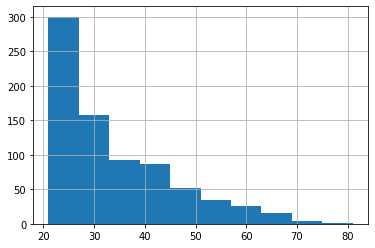

In [ ]:
X.Age.hist()

Let us apply standardization to this dataset. For this, let us use Scikit-Learn.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


To see the effect of the transformation (scaling), we can call de `describe` function on the scaled dataset:

In [ ]:
X_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.398978e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


Please, see the result of the describe function above and notice the the means and standard deviations of the attributes were all mapped to 0 and 1, respectively. For example, see below how the number 2.544261e-17 (in scientific notation) is computed:

In [ ]:
2.544261 / 100000000000000000

2.5442610000000002e-17

Now, compare the histogram below to the original one.

In [ ]:
X_scaled.Age.hist()

The code below provides some perspective on what is going on behind the scenes when we use the StandardScaler class of Scikit-Learn.

In [ ]:
age_mean = X.Age.mean()
age_std = X.Age.std()
age_column = X.Age.copy()
scaled_column = (age_column - age_mean) / age_std
print('Mean = %.2f and scale = %.2f for feature Age' % (scaler.mean_[7], scaler.scale_[7]))
print('Mean = %.2f and scale = %.2f for feature Age' % (X.Age.mean(), X.Age.std(ddof=0)))

Mean = 33.24 and scale = 11.75 for feature Age
Mean = 33.24 and scale = 11.75 for feature Age


Notice that the code above uses the corrected standard deviation value. For details about the difference between the corrected and uncorrected standard deviations, see https://en.wikipedia.org/wiki/Standard_deviation

### Which feature scaling to apply?

There is no hard and fast rule to tell you which feature scaling technique to apply. The choice of using which feature scaling to apply to depends on your problem and the Data Mining algorithm to be used. At the end of the day, the choice boils down to a trial-and-error process: you can fit your model several times, applying different scaling techniques and choose the technique that produces the best results.

## Feature encoding

Often, features of a dataset take discrete values ​​(instead of continuous values). For example, a person can have features with the following values:

- ("male, female"),
- ("from Europe", "from the USA", "from Asia"),
- ("use Firefox", "use Chrome", "use Safari", "use Internet Explorer").

Many Data Mining methods expect the features of a dataset to be only numeric. The most common types of descrite encodings are *Ordinal Encoding* and *One-Hot Encoding*. 

### Ordinal Encoding

In this type of encoding, the values os a discrete feature ​​are converted to ordinal integers. This results in a single column of integers per feature. This is a encoding normally applied to ordinal features.

![alt text](https://i.imgur.com/tEogUAr.png)



### One-Hot Encoding

Sometimes, the values ​​of a discrete feature do not have an intrinsic order. In such cases, a more appropriate coding approach is to use *dummy features*. Dummy features are those that contain values ​​like 1 or 0, representing the fact that a given sample has or does not have a certain property. This is a encoding usually applied to nominal features.

![alt text](https://i.imgur.com/TW5m0aJ.png)

### Case study: encoding features of the Salary Dataset

Let us use Scikit-Learn and Pandas for practicing feature encoding on the Salary dataset. This small dataset contains salary data used in Weisberg's book, consisting of observations on six variables for 52 teachers. The variables are:

* sx = Sex, coded: 1 for female and 0 for male
* rk = Academic Rank
* yr = Number of years in the current rank
* dg = highest degree, coded 1 if doctorate, 0 if master's degree
* yd = Number of years since the highest grade was earned
* sl = salary for the academic year, in dollars.

S. Weisberg (1985). Applied Linear Regression, Second Edition. New York: John Wiley and Sons. Page 194.

In [ ]:
import pandas as pd
df_salary = pd.read_csv('https://data.princeton.edu/wws509/datasets/salary.dat', delim_whitespace=True)
df_salary.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


Pandas provides an way of doing one-hot encoding, which is the `get_dummies` method. See the example below.

In [ ]:
df_dummy = pd.get_dummies(df_salary['sx'])
df_dummy.head()

,female,male
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [ ]:
df_salary_new = pd.concat([df_salary, df_dummy], axis=1)
df_salary_new.head()

,sx,rk,yr,dg,yd,sl,female,male
0,male,full,25,doctorate,35,36350,0,1
1,male,full,13,doctorate,22,35350,0,1
2,male,full,10,doctorate,23,28200,0,1
3,female,full,7,doctorate,27,26775,1,0
4,male,full,19,masters,30,33696,0,1


In [ ]:
df_salary_new.drop(columns=['sx'])

,rk,yr,dg,yd,sl,female,male
0,full,25,doctorate,35,36350,0,1
1,full,13,doctorate,22,35350,0,1
2,full,10,doctorate,23,28200,0,1
3,full,7,doctorate,27,26775,1,0
4,full,19,masters,30,33696,0,1
5,full,16,doctorate,21,28516,0,1
6,full,0,masters,32,24900,1,0
7,full,16,doctorate,18,31909,0,1
8,full,13,masters,30,31850,0,1
9,full,13,masters,31,32850,0,1


Now, let us encode the feature `rk`. We will use the following encoding: 1 for assistant professor, 2 for associate professor and 3 for full professor. For this, we are going to use the Pandas `replace` function.

In [ ]:
df_salary.rk.unique()

array(['full', 'associate', 'assistant'], dtype=object)

In [ ]:
df_salary.rk.values

array(['full', 'full', 'full', 'full', 'full', 'full', 'full', 'full',
       'full', 'full', 'full', 'associate', 'full', 'associate', 'full',
       'full', 'full', 'associate', 'associate', 'full', 'assistant',
       'associate', 'full', 'full', 'associate', 'full', 'associate',
       'full', 'associate', 'associate', 'assistant', 'associate',
       'assistant', 'associate', 'associate', 'associate', 'assistant',
       'assistant', 'assistant', 'assistant', 'assistant', 'assistant',
       'associate', 'assistant', 'assistant', 'assistant', 'assistant',
       'assistant', 'assistant', 'assistant', 'assistant', 'assistant'],
      dtype=object)

In [ ]:
mapping = {"assistant": 1, "associate": 2, "full": 3}

df_salary.replace({'rk': mapping}, inplace=True)

In [ ]:
df_salary.rk.unique()

array([3, 2, 1])

In [ ]:
df_salary.head()

,sx,rk,yr,dg,yd,sl
0,male,3,25,doctorate,35,36350
1,male,3,13,doctorate,22,35350
2,male,3,10,doctorate,23,28200
3,female,3,7,doctorate,27,26775
4,male,3,19,masters,30,33696


### Exercise

As an exercise, try to encode features of the Adult Dataset. Details about this dataset can be found [here](https://www.kaggle.com/wenruliu/adult-income-dataset).


In [ ]:
# Source: https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/ch04.html

# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
data = pd.read_csv(
    'adult.data', header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])

# For illustration purposes, we only select some of the columns
df_adult = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]

df_adult.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


Let us see what are the discrete features of this dataset:

In [ ]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   gender          32561 non-null  object
 4   hours-per-week  32561 non-null  int64 
 5   occupation      32561 non-null  object
 6   income          32561 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB


Complete the exercise!

## Dealing with missing values

The difference between the data found in many tutorials and data in the real world is that the latter are rarely clean and homogeneous. In particular, many data sets have missing data. To make things even more complicated, different data sources can indicate missing data in different ways (null, NaN, etc.). For example, we may have to manipulate a data matrix similar to the one presented below:

In [ ]:
import numpy as np
from numpy import nan
X = pd.DataFrame(
      np.array([[ nan, 0,   3  ],
                [ 3,   7,   9  ],
                [ 3,   5,   2  ],
                [ 4,   nan, 6  ],
                [ 8,   8,   1  ]]))
X.columns = ['c1', 'c2', 'c3']
X.head()

,c1,c2,c3
0,NaN,0.0,3.0
1,3.0,7.0,9.0
2,3.0,5.0,2.0
3,4.0,NaN,6.0
4,8.0,8.0,1.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c1      4 non-null      float64
 1   c2      4 non-null      float64
 2   c3      5 non-null      float64
dtypes: float64(3)
memory usage: 248.0 bytes


To apply some Data Mining algorithm to this data, we must first replace the missing data with an appropriate value. This procedure is known as *missing data imputation*.

The strategies to perform imputation can be simple (for example, substitution of missing values ​​for the column average) or sophisticated (for example, using a robust imputation model).

Scikit-Learn provides the class [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) to perform simple imputation. This class allows you to complete missing values ​​using some aggregation function applied to the existing values ​​in the column. This choice is made through the `strategy` parameter:

* `mean`: the average value,
* `most_frequent`: the most frequent value,
* `median`: the median value
* `constant`: replaces with a constant value (also define the parameter fill_value)

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')

imp = imp.fit(X)

X2 = pd.DataFrame(imp.transform(X), columns=X.columns)

print('Original dataset:\n', X)
print('\nImputed dataset:\n', X2)

Original dataset:
     c1   c2   c3
0  NaN  0.0  3.0
1  3.0  7.0  9.0
2  3.0  5.0  2.0
3  4.0  NaN  6.0
4  8.0  8.0  1.0

Imputed dataset:
     c1   c2   c3
0  4.5  0.0  3.0
1  3.0  7.0  9.0
2  3.0  5.0  2.0
3  4.0  5.0  6.0
4  8.0  8.0  1.0


In the example above, notice that the returned values ​​are placed in a Numpy array and we lose all metadata. Anyway, all of these strategies can be performed directly on Pandas, using the `fillna` method to assign missing values. For example, for "average", we can use the following code.

In [ ]:
X2 = X.fillna(X.mean())
print('Original dataset:\n', X)
print('\nImputed dataset:\n', X2)

Original dataset:
     c1   c2   c3
0  NaN  0.0  3.0
1  3.0  7.0  9.0
2  3.0  5.0  2.0
3  4.0  NaN  6.0
4  8.0  8.0  1.0

Imputed dataset:
     c1   c2   c3
0  4.5  0.0  3.0
1  3.0  7.0  9.0
2  3.0  5.0  2.0
3  4.0  5.0  6.0
4  8.0  8.0  1.0


Sometimes, instead of filling missing values, we can decide to drop rows or columns in with undefined values. By using Pandas, we can achieve this. See the examples below.

In [ ]:
X2 = X.dropna()
print('Original dataset:\n', X)
print('\nTransformed dataset:\n', X2)

Original dataset:
     c1   c2   c3
0  NaN  0.0  3.0
1  3.0  7.0  9.0
2  3.0  5.0  2.0
3  4.0  NaN  6.0
4  8.0  8.0  1.0

Transformed dataset:
     c1   c2   c3
1  3.0  7.0  9.0
2  3.0  5.0  2.0
4  8.0  8.0  1.0


In [ ]:
X2 = X.dropna(axis='columns')
print('Original dataset:\n', X)
print('\nTransformed dataset:\n', X2)

Original dataset:
     c1   c2   c3
0  NaN  0.0  3.0
1  3.0  7.0  9.0
2  3.0  5.0  2.0
3  4.0  NaN  6.0
4  8.0  8.0  1.0

Transformed dataset:
     c3
0  3.0
1  9.0
2  2.0
3  6.0
4  1.0
